### 📜 References

This notebook was completed with the help of the following resources:

- 📚 **The Book**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
- 🌐 **GitHub Repository**: [Hands-On Machine Learning](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb)
- 📖 **Official Documentation**: Python libraries used, including **scikit-learn**, **pandas**, **numpy**, and **matplotlib**.
- 🛠️ **Gen-AI Tools**: Utilized for debugging the code.
- The code is shared from group submission for Homework 1 Question 1 (Group 144)

In [1]:
from typing import List, Tuple

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')


* Loading and reading data

In [2]:
def normalize_labels(dataset: pd.DataFrame) -> pd.DataFrame:
    new_dataset = dataset.copy()
    new_dataset.columns = new_dataset.columns.str.lower()
    new_dataset.columns = new_dataset.columns.str.replace(" ", "_")
    return new_dataset

filename = "CO2_Emissions_Canada.csv"

data = pd.read_csv(f'./{filename}')
data_normalized = normalize_labels(data)

data_normalized.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# EDA

In [3]:
data_normalized.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   vehicle_class                     7385 non-null   object 
 3   engine_size(l)                    7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_city_(l/100_km)  7385 non-null   float64
 8   fuel_consumption_hwy_(l/100_km)   7385 non-null   float64
 9   fuel_consumption_comb_(l/100_km)  7385 non-null   float64
 10  fuel_consumption_comb_(mpg)       7385 non-null   int64  
 11  co2_emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
data_normalized.isnull().sum()

make                                0
model                               0
vehicle_class                       0
engine_size(l)                      0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city_(l/100_km)    0
fuel_consumption_hwy_(l/100_km)     0
fuel_consumption_comb_(l/100_km)    0
fuel_consumption_comb_(mpg)         0
co2_emissions(g/km)                 0
dtype: int64

In [5]:
def segregate_features(data : pd.DataFrame) -> Tuple[List[str], List[str]]:
    continuous_features = []
    categorical_features = []
    
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            continuous_features.append(column)
        elif pd.api.types.is_object_dtype(data[column]):
            categorical_features.append(column)
    
    return continuous_features, categorical_features

In [6]:
continuous_features, categorical_features = segregate_features(data_normalized)

In [7]:
continuous_features 

['engine_size(l)',
 'cylinders',
 'fuel_consumption_city_(l/100_km)',
 'fuel_consumption_hwy_(l/100_km)',
 'fuel_consumption_comb_(l/100_km)',
 'fuel_consumption_comb_(mpg)',
 'co2_emissions(g/km)']

In [8]:
categorical_features

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

### DATA SUMMARY

Total 7385 records

## How much data is present?

| Attribute                                      | Number of Records |
|------------------------------------------------|--------------------|
| `make`                                         | 7385               |
| `model`                                        | 7385               |
| `vehicle_class`                                | 7385               |
| `engine_size(l)`                               | 7385               |
| `cylinders`                                    | 7385               |
| `transmission`                                 | 7385               |
| `fuel_type`                                    | 7385               |
| `fuel_consumption_city_(l/100_km)`             | 7385               |
| `fuel_consumption_hwy_(l/100_km)`              | 7385               |
| `fuel_consumption_comb_(l/100_km)`             | 7385               |
| `fuel_consumption_comb_(mpg)`                  | 7385               |
| `co2_emissions(g/km)`                          | 7385               |

## What attributes/features are continuous valued?

The following attributes have continuous numerical values:

| Continuous Attributes                          |
|------------------------------------------------|
| `engine_size(l)`                               |
| `cylinders`                                    |
| `fuel_consumption_city_(l/100_km)`             |
| `fuel_consumption_hwy_(l/100_km)`              |
| `fuel_consumption_comb_(l/100_km)`             |
| `fuel_consumption_comb_(mpg)`                  |
| `co2_emissions(g/km)`                          |

## Which attributes are categorical?

| Categorical Attributes                         |
|------------------------------------------------|
| `make`                                         |
| `model`                                        |
| `vehicle_class`                                |
| `transmission`                                 |
| `fuel_type`                                    |


### VISUALIZATIONS

In [9]:
data_normalized.drop(['make','model'], axis=1, inplace=True)

In [10]:
data_cleaned = data_normalized
continuous_features, categorical_features = segregate_features(data_cleaned)

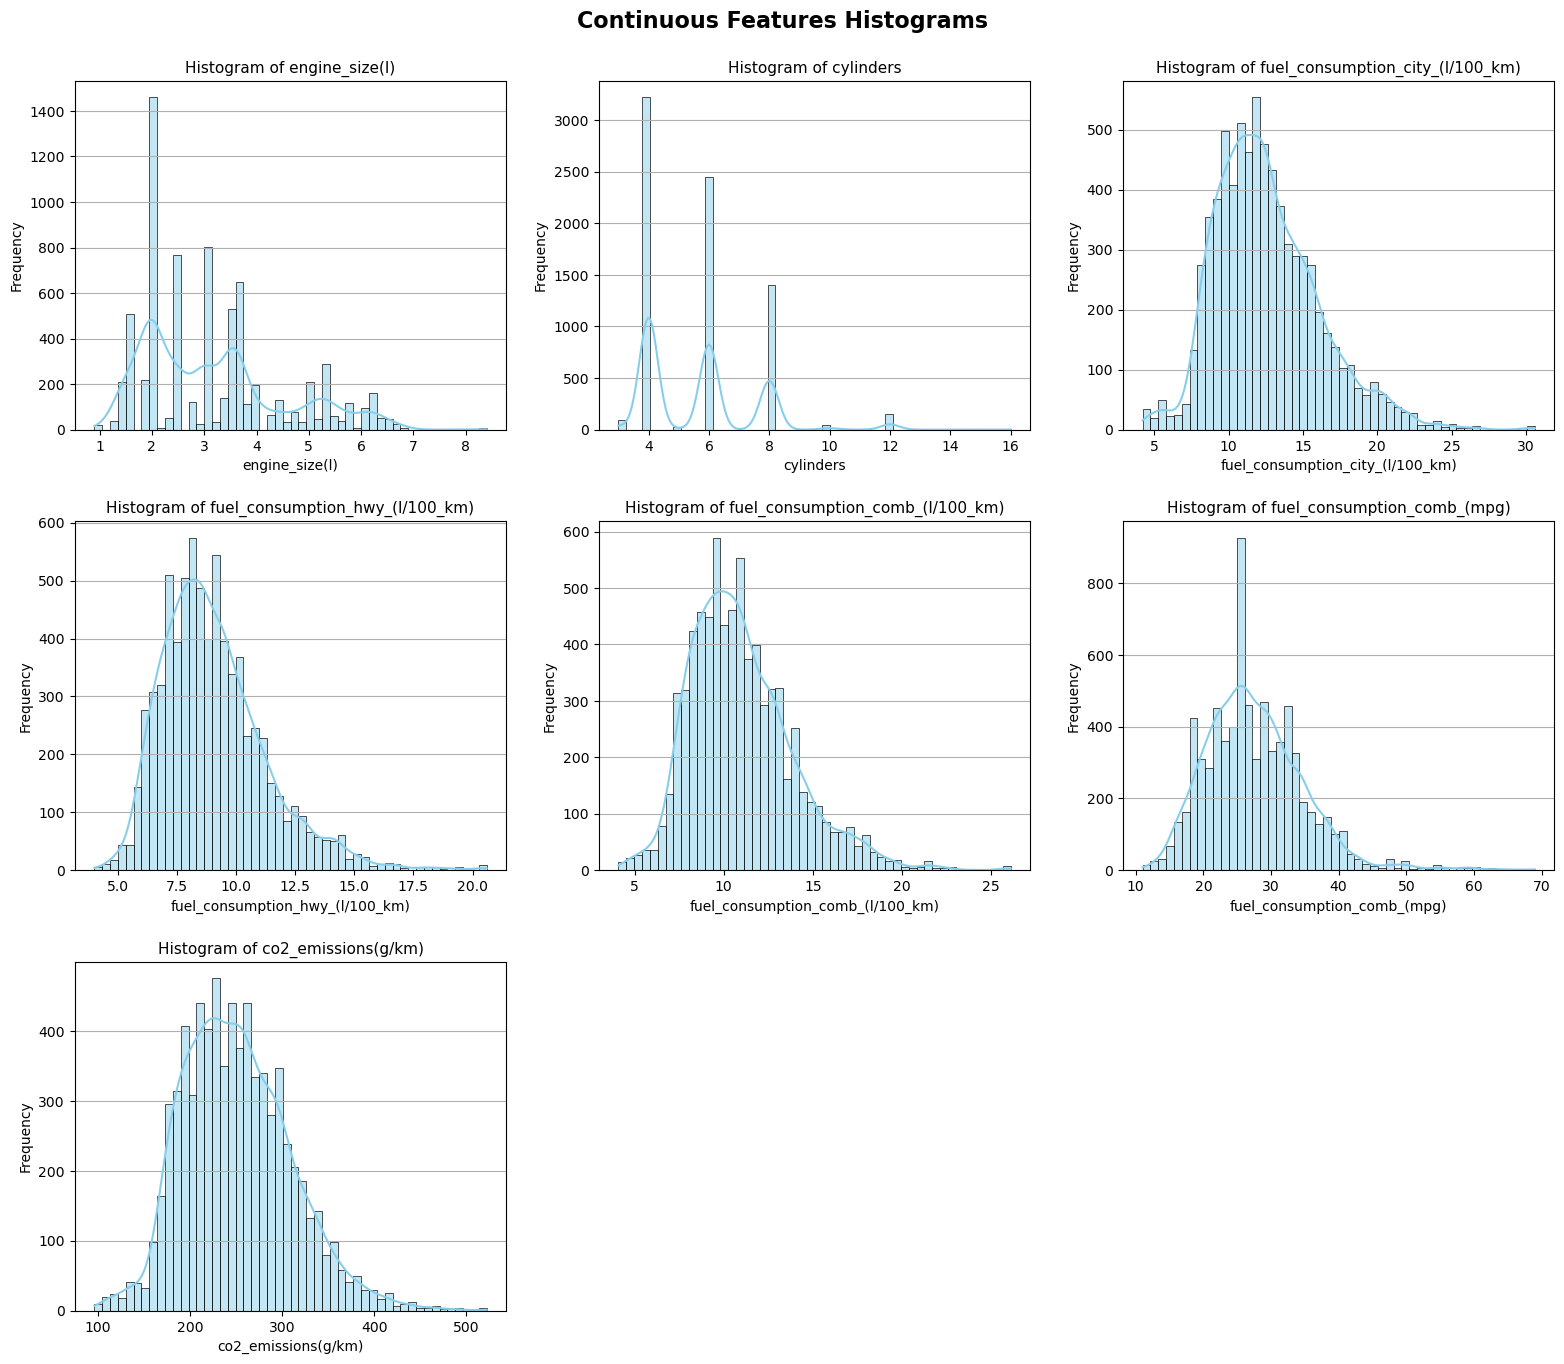

In [11]:
def plot_continuous_features_histograms(dataframe : pd.DataFrame, continuous_features : list , bin_size : int = 50) -> None:
    num_features = len(continuous_features)
    cols = 3  # Number of columns in the plot grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calculate number of rows

    plt.figure(figsize=(16, 14))  # Set the figure size
    plt.suptitle('Continuous Features Histograms', fontsize=16, weight='bold')

    for i, feature in enumerate(continuous_features):
        plt.subplot(rows, cols, i + 1)  # Create a subplot for each feature
        sns.histplot(data=dataframe, x=feature, bins=bin_size, kde=True, color='skyblue')
        plt.title(f'Histogram of {feature}', fontsize=11)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y')

    plt.tight_layout(pad=2)  # Adjust layout
    plt.show()

plot_continuous_features_histograms(data_cleaned, continuous_features)

# Data Analysis Summary

## Engine Size
- **Distribution**: Skewed right, with a long tail to the right.
- **Skewness**: Positively skewed.
- **Outliers**: Possible outliers on the right side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.

## Cylinders
- **Distribution**: Approximately normal, with a slight skew to the right.
- **Skewness**: Slightly positively skewed.
- **Outliers**: No obvious outliers.
- **Treatment**: The distribution is relatively well-behaved, but consider checking for outliers using statistical methods.

## Fuel Consumption City (l/100 km)
- **Distribution**: Skewed right, with a long tail to the right.
- **Skewness**: Positively skewed.
- **Outliers**: Possible outliers on the right side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.

## Fuel Consumption Hwy (l/100 km)
- **Distribution**: Skewed right, with a long tail to the right.
- **Skewness**: Positively skewed.
- **Outliers**: Possible outliers on the right side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.

## Fuel Consumption Comb (l/100 km)
- **Distribution**: Skewed right, with a long tail to the right.
- **Skewness**: Positively skewed.
- **Outliers**: Possible outliers on the right side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.

## Fuel Consumption Comb (mpg)
- **Distribution**: Skewed left, with a long tail to the left.
- **Skewness**: Negatively skewed.
- **Outliers**: Possible outliers on the left side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.

## CO2 Emissions (g/km)
- **Distribution**: Skewed right, with a long tail to the right.
- **Skewness**: Positively skewed.
- **Outliers**: Possible outliers on the right side.
- **Treatment**: Consider transforming the data (e.g., log transformation) to address skewness if necessary for modeling purposes.


In [12]:
def compute_pearson_correlation(dataset: pd.DataFrame) -> pd.DataFrame:
    # Select only continuous attributes (numerical columns)
    continuous_df = dataset.select_dtypes(include=['float64', 'int64'])
    
    # Compute the Pearson Correlation Coefficient matrix
    pcc_matrix = continuous_df.corr(method='pearson')
    
    return pcc_matrix

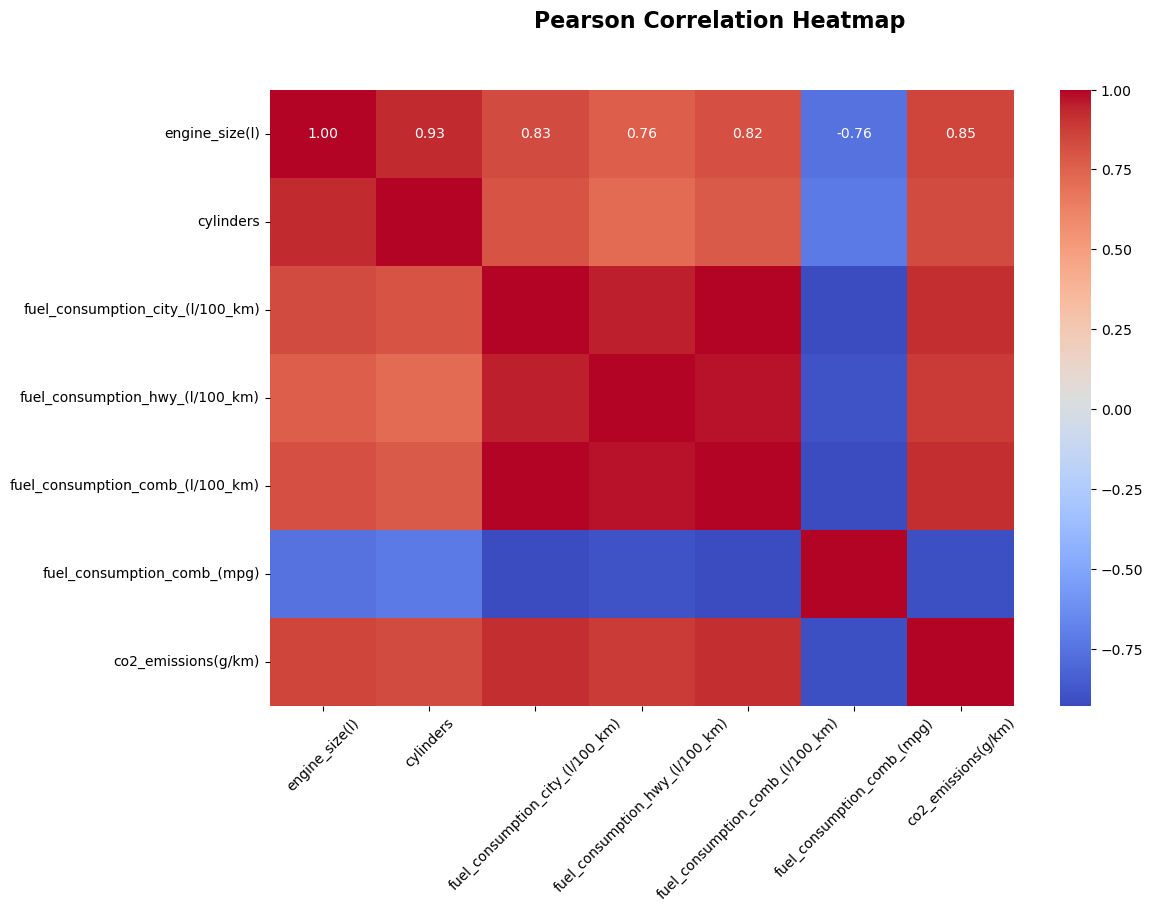

In [13]:
# computing the correlation matrix
pcc_matrix = compute_pearson_correlation(data_cleaned)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
plt.suptitle('Pearson Correlation Heatmap', fontsize=16, weight='bold')
sns.heatmap(pcc_matrix, annot=True, cmap="coolwarm", fmt='.2f')

# rotate the x and y ticks
plt.xticks(rotation=45)

plt.show()

# Histogram Analysis

## Engine Size and Cylinders
- The distribution of engine sizes is right-skewed, with most vehicles having smaller engines (around 2-3 liters).
- The number of cylinders is concentrated around 4 and 6, indicating common engine configurations.

## Fuel Consumption
- Fuel consumption in city, highway, and combined (L/100 km) shows a right-skewed distribution, with most vehicles consuming less fuel.
- Fuel consumption in miles per gallon (mpg) is left-skewed, reflecting the inverse relationship with L/100 km.

## CO2 Emissions
- CO2 emissions have a normal distribution centered around 200 g/km, with a slight right skew.

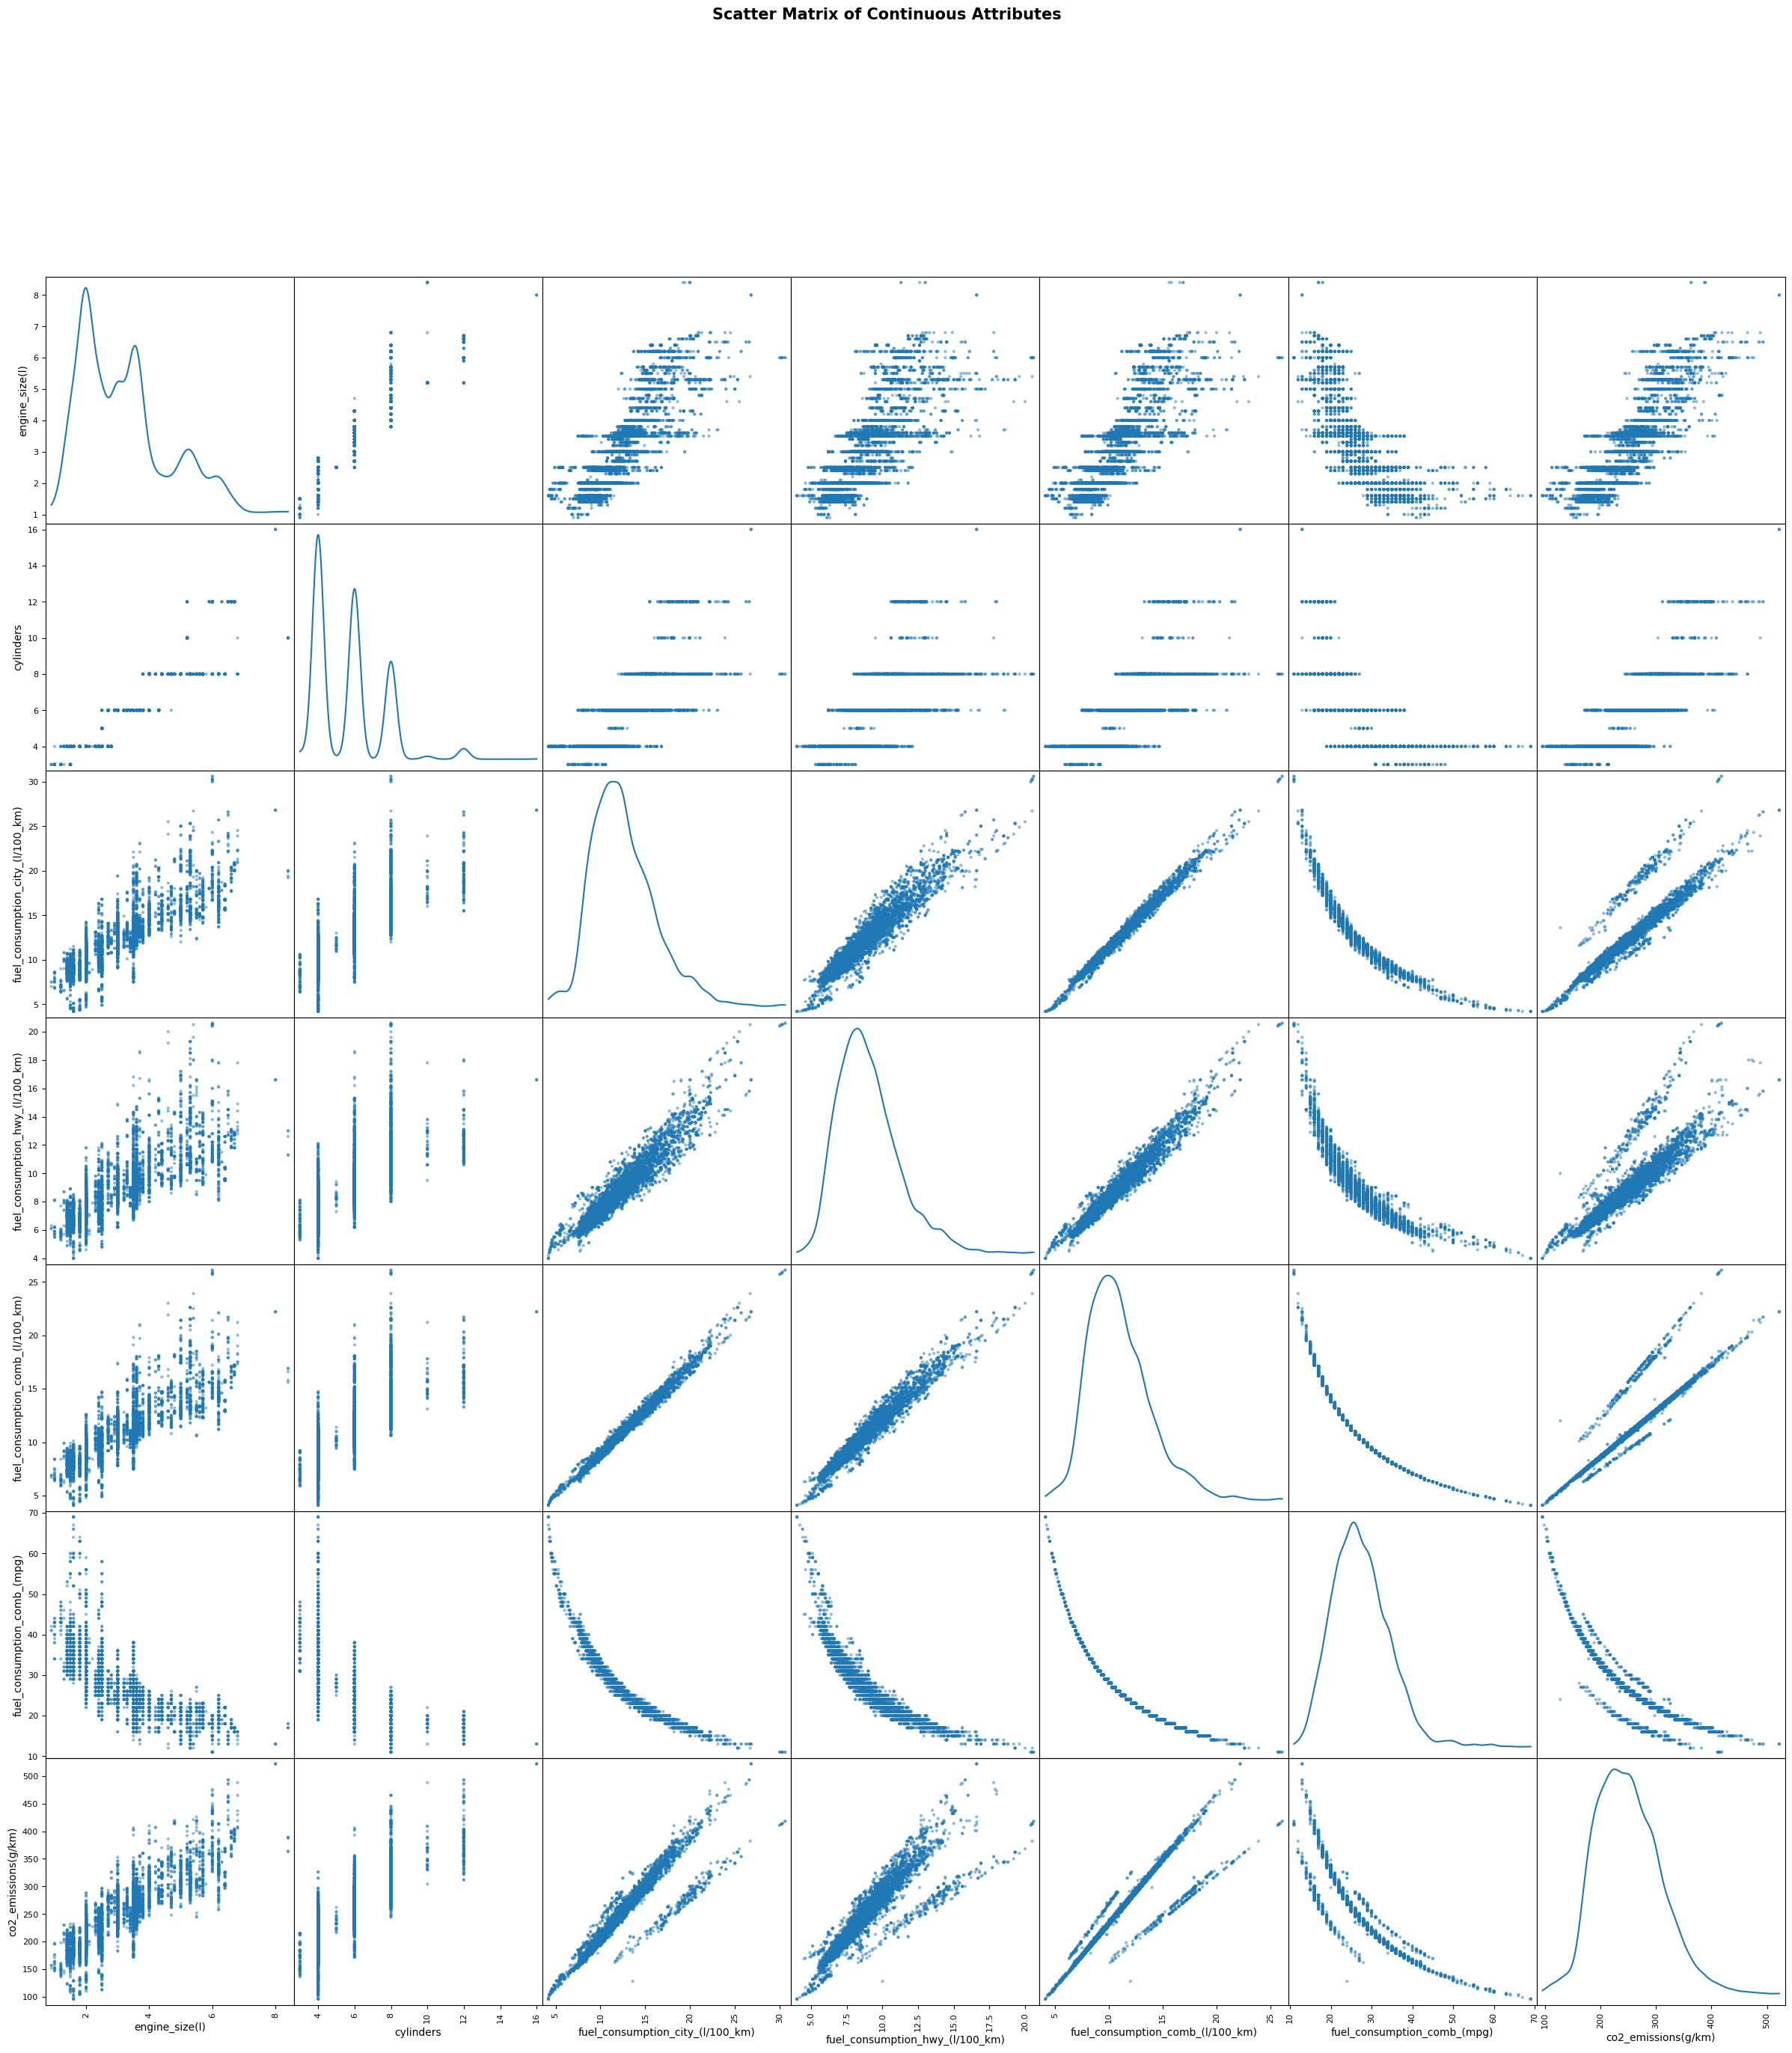

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def generate_scatter_matrix(df : pd.DataFrame, plot_title : str ="Scatter Matrix of Continuous Attributes") -> None:
    # Automatically get continuous columns from the DataFrame
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Create a scatter matrix
    scatter_matrix(df[continuous_columns], figsize=(30, 30), diagonal='kde', alpha=0.5)
    
    # Set the title
    plt.suptitle(plot_title, fontsize=15, weight='bold', y=1)
    plt.show()

# Example usage
generate_scatter_matrix(data_cleaned)

## Scatter Matrix Analysis

### Engine Size vs. CO2 Emissions
- There is a positive linear relationship; larger engines tend to emit more CO2.

### Cylinders vs. CO2 Emissions
- More cylinders generally correlate with higher CO2 emissions, reflecting larger or more powerful engines.

### Fuel Consumption vs. CO2 Emissions
- Higher fuel consumption (in L/100 km) correlates strongly with higher CO2 emissions.
- Conversely, higher mpg correlates with lower CO2 emissions, as expected due to the inverse nature of these measures.

### Inter-relationships Among Fuel Consumption Metrics
- Strong positive correlations exist between city, highway, and combined fuel consumption metrics in L/100 km.
- A negative correlation between mpg and L/100 km metrics reflects their inverse relationship.

---

Overall, vehicles with larger engines and more cylinders tend to consume more fuel and emit more CO2. Fuel efficiency (mpg) inversely relates to CO2 emissions, highlighting the importance of efficient vehicles in reducing emissions.


In [15]:
def transform_continuous_to_categorical(dataset: pd.DataFrame, column: str, categories_count = 5) -> pd.DataFrame:
    new_dataset = dataset.copy()

    if column not in new_dataset.columns:
        raise ValueError(f"Column '{column}' does not exist in the new_dataset.")
    
    min_value = new_dataset[column].min()
    max_value = new_dataset[column].max()
    
    if max_value == min_value:
        raise ValueError("The minimum and maximum values are the same; cannot create bins.")
    
    bin_width = (max_value - min_value) / categories_count
    bin_edges = [min_value + i * bin_width for i in range(categories_count + 1)]
    
    labels = [f'{i+1}' for i in range(categories_count)]
    new_dataset[f'{column}_categorical'] = pd.cut(new_dataset[column], bins=bin_edges, labels=labels, include_lowest=True)

    return new_dataset


In [16]:
# transforming the log_gdp_per_capita to categorical for stratification
data_cleaned = transform_continuous_to_categorical(data_cleaned, "fuel_consumption_city_(l/100_km)", 5)

In [17]:
data_cleaned.head()

,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km),fuel_consumption_city_(l/100_km)_categorical
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,2
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2


### DATA SPLITTING

In [18]:
def generate_stratified_datasets(
    dataset: pd.DataFrame, 
    categorical_column: str, 
    n_splits: int = 10, 
    test_size: float = 0.25, 
    random_state: int = 42
) -> List[Tuple[pd.DataFrame, pd.DataFrame]]:    
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("The dataset must be a pandas DataFrame.")
    
    if categorical_column not in dataset.columns:
        raise ValueError(f"Column '{categorical_column}' does not exist in the dataset.")

    stratified_splits = []
    splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

    for train_index, test_index in splitter.split(dataset, dataset[categorical_column]):
        stratified_train_set = dataset.iloc[train_index]
        stratified_test_set = dataset.iloc[test_index]
        stratified_splits.append((stratified_train_set, stratified_test_set))

    return stratified_splits

In [19]:
stratified_dataset = generate_stratified_datasets(data_cleaned, "fuel_consumption_city_(l/100_km)_categorical")

In [20]:
def cat_proportions(data: pd.DataFrame):
    return data["fuel_consumption_city_(l/100_km)_categorical"].value_counts() / len(data)


train_set, test_set = train_test_split(data_cleaned, test_size=0.25, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": cat_proportions(data_cleaned),
    "Stratified %": cat_proportions(stratified_dataset[0][1]),
    "Random %": cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "fuel_consumption_city_(l/100_km)_categorical"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
fuel_consumption_city_(l/100_km)_categorical,,,,,
1,18.10,18.08,19.00,-0.12,4.97
2,58.40,58.42,57.44,0.03,-1.64
3,19.96,19.98,20.14,0.10,0.91
4,3.28,3.25,3.19,-0.87,-2.52
5,0.26,0.27,0.22,5.22,-15.82



## Method Used for Partitioning

We have used 25% of dataset as `test_data` and remaining 75% as `train_data` as asked in the question. The method employed for partitioning the dataset is **stratified sampling**. This approach ensures that the sample reflects the underlying distribution of a categorical variable within the dataset. The primary steps involved in this method are as follows:

1. **Categorical Conversion**: Before applying stratified sampling, a continuous column (`fuel_consumption_city_(l/100_km)`) was converted into a categorical variable. This transformation allows us to define specific groups or strata within the dataset based on distinct intervals or categories of the continuous variable.

2. **Stratified Shuffle Split**: The `StratifiedShuffleSplit` class from the `sklearn.model_selection` module is utilized to generate multiple train-test splits. This technique maintains the same proportion of each category in both the training and test sets as found in the entire dataset. This helps to avoid any biases that may arise from random sampling, especially in datasets with imbalanced class distributions.

3. **Multiple Splits**: The function can generate multiple stratified splits (controlled by the `n_splits` parameter), allowing for a robust evaluation of model performance across different samples while ensuring that each split remains representative of the original dataset.

## Verification of Representativeness

To verify that the test portion of the dataset is representative of the entire dataset, we can compare the distributions of the categorical variable in both the training and test sets. The following steps can be taken to perform this verification:

1. **Distribution Comparison**: For each split, we can compute and visualize the distribution of the categorical variable in both the training and test sets. This can be done using bar plots or histograms to observe the proportions of each category.

2. **Statistical Tests**: We can apply statistical tests, such as the Chi-squared test, to compare the distributions of the categorical variable in the training and test datasets. If the p-value is greater than a chosen significance level (commonly 0.05), we fail to reject the null hypothesis, indicating that there is no significant difference in distributions.

3. **Aggregate Results**: After performing these comparisons across all splits, we can aggregate the results to confirm that the test sets consistently reflect the distribution of the original dataset.

### Results Comparison

Using the following code, we compared the proportions of the categorical variable (`fuel_consumption_city_(l/100_km)_categorical`) across three different datasets: the overall dataset, the stratified sample, and the random sample.

```python
def cat_proportions(data: pd.DataFrame):
    return data["fuel_consumption_city_(l/100_km)_categorical"].value_counts() / len(data)


train_set, test_set = train_test_split(data_cleaned, test_size=0.25, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": cat_proportions(data_cleaned),
    "Stratified %": cat_proportions(stratified_dataset[0][1]),
    "Random %": cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "fuel_consumption_city_(l/100_km)_categorical"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)
(compare_props * 100).round(2)
```


1. **Overall Proportions**: This column shows the proportion of each category in the overall dataset.

2. **Stratified Proportions**: The proportions obtained from the stratified sampling method are very close to the overall proportions, indicating that stratified sampling effectively maintained the original distribution.

3. **Random Proportions**: The proportions obtained from random sampling show larger deviations from the overall proportions in some categories, indicating potential bias.

4. **Error Metrics**:
   - **Strat. Error %**: Measures the deviation of the stratified sample's proportions from the overall proportions, showing small values that suggest good representation.
   - **Rand. Error %**: Shows larger deviations in some categories, indicating that random sampling can lead to biased samples, especially in imbalanced datasets.

### Conclusion

The results indicate that stratified sampling is more effective than random sampling in preserving the underlying distribution of the categorical variable. The close alignment of stratified proportions with the overall proportions suggests that this method reduces sampling bias, making it a better choice for ensuring representative samples, especially in datasets with imbalanced categories.

By following these steps, we can ensure that the test portions obtained from the stratified sampling method provide a reliable basis for evaluating the performance of models trained on the dataset. This approach enhances the validity of the model's predictive capabilities when applied to new, unseen data.
```

-------------------------------------------------------------

# Linear Regression Model

A **linear regression model** is a statistical technique used to model the relationship between a dependent variable (also called the target or response variable) and one or more independent variables (also known as features or predictors). The goal is to find a linear equation that best predicts the target variable based on the input features.

## Key Components of Linear Regression:
1. **Model Equation**:
   The basic form of a linear regression model with one feature is:
   
   \[
   y = intercept + slope \cdot x + error
   \]

   - `y`: The predicted or dependent variable.
   - `x`: The independent variable (feature).
   - `intercept`: The value of `y` when `x = 0`.
   - `slope`: The coefficient that represents the relationship between the feature `x` and the target `y`.
   - `error`: The residual or error term, which accounts for the difference between the predicted and actual value.

   For multiple features, the model generalizes to:

   \[
   y = intercept + coef_1 \cdot x_1 + coef_2 \cdot x_2 + \dots + coef_n \cdot x_n + error
   \]
   This is called **multiple linear regression**.


2. **Closed-form Solution** (Normal Equation):
   Linear regression can be solved analytically by using the **Normal Equation**. For the matrix form of the equation \( X\beta = y \), the optimal coefficients can be computed as:

   \[
   coef = (X^T X)^{-1} X^T y
   \]

   Here, `X` is the matrix of features, and `y` is the vector of target values. This is an exact solution but computationally expensive for very large datasets.

3. **Gradient Descent**:
   In cases where the dataset is large, **Gradient Descent** is often used to iteratively find the optimal coefficients by minimizing the cost function (MSE). This involves updating the coefficients in small steps, adjusting based on the gradient (slope) of the cost function.

4. **Types of Linear Regression**:
   - **Simple Linear Regression**: One independent variable.
   - **Multiple Linear Regression**: Multiple independent variables.
   - **Regularized Linear Models**:
     - **Ridge Regression**: Adds an \( L_2 \) penalty to the cost function to prevent overfitting by shrinking coefficients.
     - **Lasso Regression**: Adds an \( L_1 \) penalty, which can shrink some coefficients to zero, effectively performing feature selection.

5. **Performance Metrics**:
   After training, a linear regression model can be evaluated using metrics such as:
   - **Mean Squared Error (MSE)**: Average squared difference between the actual and predicted values.
   - **Mean Absolute Error (MAE)**: Average absolute difference between actual and predicted values.

In [21]:
continuous_features, categorical_features

(['engine_size(l)',
  'cylinders',
  'fuel_consumption_city_(l/100_km)',
  'fuel_consumption_hwy_(l/100_km)',
  'fuel_consumption_comb_(l/100_km)',
  'fuel_consumption_comb_(mpg)',
  'co2_emissions(g/km)'],
 ['vehicle_class', 'transmission', 'fuel_type'])

In [22]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = MinMaxScaler(feature_range=(-1, 1))
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# removing life_ladder from the continuous features
feature_to_remove = "co2_emissions(g/km)"
if feature_to_remove in continuous_features:
    continuous_features.remove(feature_to_remove)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

strat_set_mean_cv_scores = []
strat_set_test_mses = []


for index, dataset in enumerate(stratified_dataset):
    stratified_train_dataset, stratified_test_dataset = dataset

    emissions = stratified_train_dataset.drop(["co2_emissions(g/km)", "fuel_consumption_city_(l/100_km)_categorical"], axis=1) # X_train
    emissions_labels = stratified_train_dataset["co2_emissions(g/km)"].copy() # y_train

    emissions_test = stratified_test_dataset.drop(["co2_emissions(g/km)", "fuel_consumption_city_(l/100_km)_categorical"], axis=1) # X_test
    emissions_labels_test = stratified_test_dataset["co2_emissions(g/km)"].copy() # y_test

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

    # Cross-validation
    cv_scores = cross_val_score(model_pipeline, emissions, emissions_labels, cv=3, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()

    # Train the model
    model_pipeline.fit(emissions, emissions_labels)

    # Evaluate on test set
    emissions_pred = model_pipeline.predict(emissions)
    test_mse = mean_squared_error(emissions_labels, emissions_pred)

    print(f'========================= STRAT SET {index}=======================')
    print(f"Mean CV MSE: {mean_cv_score}")
    print(f"Train MSE: {test_mse}")

    strat_set_mean_cv_scores.append(mean_cv_score)
    strat_set_test_mses.append(test_mse)

best_model_index = strat_set_mean_cv_scores.index(min(strat_set_mean_cv_scores))

print(f'===================== BEST MODEL SET {best_model_index} =====================')
print(f"Mean CV MSE: {strat_set_mean_cv_scores[best_model_index]}")
print(f"Train MSE: {strat_set_test_mses[best_model_index]}")


========================= STRAT SET 0=======================
Mean CV MSE: 23.97016380890551
Train MSE: 22.364464917274976
========================= STRAT SET 1=======================
Mean CV MSE: 24.870084016063032
Train MSE: 23.763893479559233
========================= STRAT SET 2=======================
Mean CV MSE: 24.864812818267428
Train MSE: 23.447104622424686
========================= STRAT SET 3=======================
Mean CV MSE: 24.44123552312477
Train MSE: 22.514121262749896
========================= STRAT SET 4=======================
Mean CV MSE: 24.706232376844582
Train MSE: 23.112163372695555
========================= STRAT SET 5=======================
Mean CV MSE: 24.41861313687726
Train MSE: 23.356238270257307
========================= STRAT SET 6=======================
Mean CV MSE: 24.79455729321789
Train MSE: 23.077821057855555
========================= STRAT SET 7=======================
Mean CV MSE: 24.286018201754132
Train MSE: 22.551473431934593
====================

In [24]:
stratified_train_dataset, stratified_test_dataset = stratified_dataset[best_model_index]

In [25]:
emissions = stratified_train_dataset.drop(["co2_emissions(g/km)", "fuel_consumption_city_(l/100_km)_categorical"], axis=1) # X_train
emissions_labels = stratified_train_dataset["co2_emissions(g/km)"].copy() # y_train

emissions_test = stratified_test_dataset.drop(["co2_emissions(g/km)", "fuel_consumption_city_(l/100_km)_categorical"], axis=1) # X_test
emissions_labels_test = stratified_test_dataset["co2_emissions(g/km)"].copy() # y_test

In [26]:
def root_mean_squared_error(X: object , y : object) -> object:
    return np.sqrt(mean_squared_error(X, y))



X_test = stratified_test_dataset.drop(["co2_emissions(g/km)"], axis=1)
y_test = stratified_test_dataset["co2_emissions(g/km)"].copy()
final_predictions = model_pipeline.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f"RMSE on Test Set: {final_rmse}")

RMSE on Test Set: 5.183891228279423


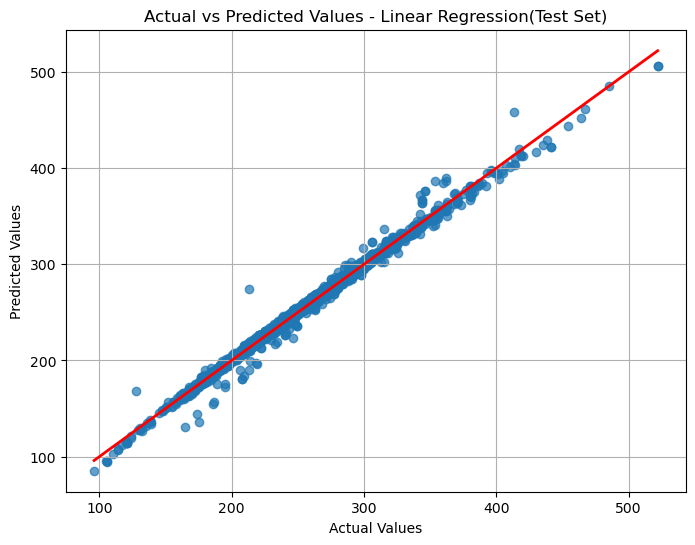

In [27]:
# Plot Actual vs Predicted values (Test set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Values - Linear Regression(Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

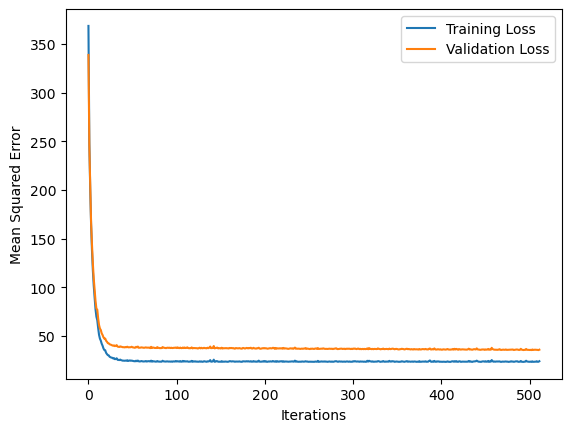

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # Example preprocessor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# # Example preprocessing step, adjust as needed
# preprocessor = StandardScaler()  # Use your actual preprocessor here

# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(emissions)
y_train_transformed = emissions_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(emissions_test)
y_test_transformed = emissions_labels_test

# Initialize SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', eta0=0.01, learning_rate='constant')

# Initialize losses
train_losses = []
val_losses = []

# Incremental training
for i in range(512):
    sgd_model.partial_fit(X_train_transformed, y_train_transformed)
    
    # Predictions
    train_pred = sgd_model.predict(X_train_transformed)
    val_pred = sgd_model.predict(X_test_transformed)

    # Calculate and store losses
    train_losses.append(mean_squared_error(y_train_transformed, train_pred))
    val_losses.append(mean_squared_error(y_test_transformed, val_pred))

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.show()


In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

alphas = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:

    print(f"==========================ALPHA : {alpha}=======================================================")
    ridge = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge(alpha=alpha))])
    lasso = Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso(alpha=alpha))])
    elastic = Pipeline(steps=[('preprocessor', preprocessor), ('model', ElasticNet(alpha=alpha, l1_ratio=0.5))])

    for name, model in [('Ridge', ridge), ('Lasso', lasso), ('Elastic Net', elastic)]:
        cv_scores = cross_val_score(model, emissions, emissions_labels, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()
        print(f"{name} (alpha={alpha}): Mean CV MSE: {mean_cv_score}")

        if name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif name == 'Elastic Net':
            elastic_mse.append(mean_cv_score)

print(f"=============================================================================================")

==========================ALPHA : 0.1=======================================================
Ridge (alpha=0.1): Mean CV MSE: 23.448331583682744
Lasso (alpha=0.1): Mean CV MSE: 26.0248945514999
Elastic Net (alpha=0.1): Mean CV MSE: 236.0796649986119
==========================ALPHA : 0.5=======================================================
Ridge (alpha=0.5): Mean CV MSE: 23.500780996805904
Lasso (alpha=0.5): Mean CV MSE: 60.672456164421924
Elastic Net (alpha=0.5): Mean CV MSE: 733.2769141797197
==========================ALPHA : 1.0=======================================================
Ridge (alpha=1.0): Mean CV MSE: 23.671081668527165
Lasso (alpha=1.0): Mean CV MSE: 136.97228749628997
Elastic Net (alpha=1.0): Mean CV MSE: 1212.2070075971137
==========================ALPHA : 2.0=======================================================
Ridge (alpha=2.0): Mean CV MSE: 24.227662639642745
Lasso (alpha=2.0): Mean CV MSE: 389.53011285188956
Elastic Net (alpha=2.0): Mean CV MSE: 1851.3264469657

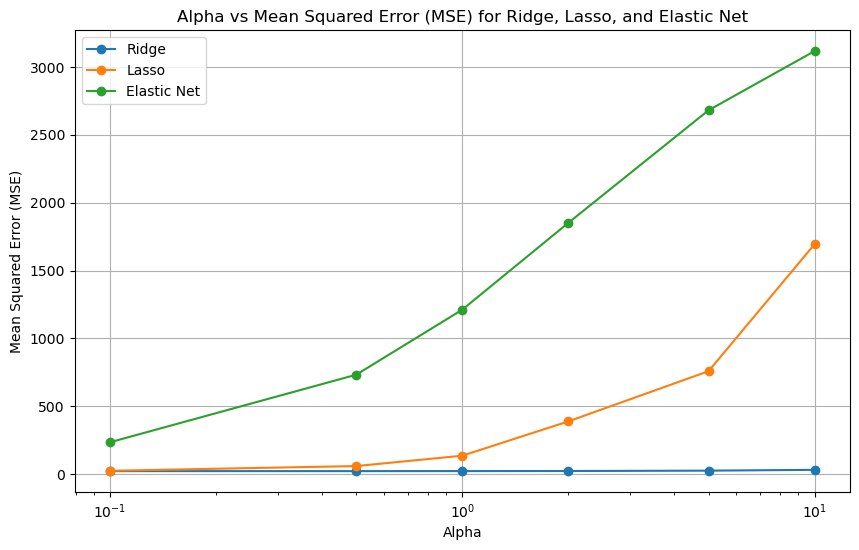

In [30]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

# Fit the model on training data
model_pipeline.fit(emissions, emissions_labels)

# Predictions on training set
emissions_train_pred = model_pipeline.predict(emissions)
train_mse = mean_squared_error(emissions_labels, emissions_train_pred)

# Predictions on test set
final_predictions = model_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, final_predictions)

# Calculate RMSE
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Check for overfitting or underfitting
if train_rmse < test_rmse:
    print("Potential overfitting: The model performs better on the training set than the test set.")
elif train_rmse > test_rmse:
    print("Potential underfitting: The model performs better on the test set than the training set.")
else:
    print("The model seems to be well-fit, with similar performance on both sets.")


Train RMSE: 4.723120211833487
Test RMSE: 5.183891228279423
Potential overfitting: The model performs better on the training set than the test set.


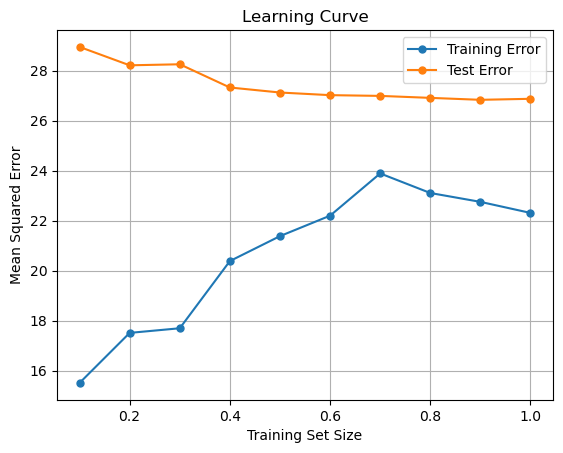

In [32]:
# Learning curve to check for overfitting/underfitting
train_sizes = [i/10 for i in range(1, 11)]
train_errors = []
test_errors = []

for train_size in train_sizes:
    model_pipeline.fit(emissions[:int(train_size * len(emissions))], emissions_labels[:int(train_size * len(emissions_labels))])

    train_pred = model_pipeline.predict(emissions[:int(train_size * len(emissions))])
    test_pred = model_pipeline.predict(X_test)

    train_errors.append(mean_squared_error(emissions_labels[:int(train_size * len(emissions_labels))], train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot learning curve
plt.plot(train_sizes, train_errors, label='Training Error', marker='o', markersize=5)
plt.plot(train_sizes, test_errors, label='Test Error', marker='o', markersize=5)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Hyperparameter tuning

In [35]:
# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(emissions)
X_train_transformed = pd.DataFrame(X_train_transformed.toarray())
y_train_transformed = emissions_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(emissions_test)
X_test_transformed = pd.DataFrame(X_test_transformed.toarray())
y_test_transformed = emissions_labels_test

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Define the parameter grid without batch_size
param_grid = {
    'n_epochs': [50, 100, 200, 500, 1000, 2000, 5000],  # Number of epochs
    #'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Learning rates
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],  # Regularization strength
    'learning_rate_val': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],  # initial learning rate
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))
#print(param_combinations)

# Function to train model
def train_model(X, y, n_epochs, learning_rate_val, eta0, alpha):
    model = SGDRegressor(max_iter=n_epochs, learning_rate=learning_rate_val, eta0=eta0, alpha=alpha, random_state=42)
    model.fit(X, y)
    return model

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store best model and score
best_score = float('inf')
best_params = None

# Iterate through all parameter combinations
for params in param_combinations:
    n_epochs, alpha, learning_rate_val, eta0 = params
    
    # Perform k-fold cross-validation
    cv_scores = []
    for train_index, val_index in kf.split(emissions):
        X_train_fold, X_val_fold = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
        y_train_fold, y_val_fold = y_train_transformed.iloc[train_index], y_train_transformed.iloc[val_index]
        
        # Train the model
        model = train_model(X_train_fold, y_train_fold, n_epochs, learning_rate_val, eta0, alpha)
        
        # Evaluate the model
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        cv_scores.append(mse)
    
    # Calculate average MSE across all folds
    avg_mse = np.mean(cv_scores)
    
    # Update best model if current model performs better
    if avg_mse < best_score:
        best_score = avg_mse
        best_params = {
            'n_epochs': n_epochs,
            'learning_rate': learning_rate_val,
            'alpha': alpha,
            'eta0' : eta0
        }

# Print results
print("Best parameters:", best_params)
print("Best MSE:", best_score)


Best parameters: {'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'eta0': 0.1}
Best MSE: 23.240224170422643


In [33]:
# Function to plot actual vs predicted values
def plot_real_vs_predicted(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.show()

# Function to plot training vs validation loss for SGD
def plot_loss(epochs, train_loss, val_loss):
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

# Polynomial Regression Model

A **polynomial regression model** is an extension of linear regression that models the relationship between a dependent variable (target) and one or more independent variables (features) as an \( n \)-degree polynomial. Unlike linear regression, where the relationship between the variables is assumed to be linear, polynomial regression can capture non-linear relationships by adding powers of the independent variables.

## Key Components of Polynomial Regression:
 **Model Equation**:
   The basic form of a polynomial regression model for a single feature is:

   \[
   y = intercept + coef_1 \cdot x + coef_2 \cdot x^2 + \dots + coef_n \cdot x^n + error
   \]

   - `y`: The predicted or dependent variable.
   - `x`: The independent variable (feature).
   - `intercept`: The value of `y` when `x = 0`.
   - `coef_1`, `coef_2`, ..., `coef_n`: Coefficients corresponding to the powers of `x`.
   - `x^2`, `x^3`, ..., `x^n`: Higher-order terms, representing non-linear effects.
   - `error`: The residual term that captures the difference between the predicted and actual value.

   For multiple features, the model generalizes to:

   \[
   y = intercept + coef_1 \cdot x_1 + coef_2 \cdot x_2 + \dots + coef_n \cdot x_n + coef_{11} \cdot x_1^2 + coef_{12} \cdot x_1 x_2 + \dots + error
   \]

   This is known as **multivariate polynomial regression**.


* Polynomial Regression

In [36]:
# Degree 2

X_train = emissions
y_train = emissions_labels
X_val = emissions_test
y_val = emissions_labels_test

from sklearn.preprocessing import PolynomialFeatures

poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Cross-validation
cv_scores = cross_val_score(poly_model_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Train the model
poly_model_pipeline.fit(X_train, y_train)

# Evaluate on validation set
val_pred = poly_model_pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)

# # Plot actual vs predicted values
# plot_real_vs_predicted(y_val, val_pred, "Polynomial Regression (Closed Form)")

print(f"Mean CV MSE: {mean_cv_score}")
print(f"Validation MSE: {val_mse}")


Mean CV MSE: 8.501336257936307
Validation MSE: 13.070668467765817


In [37]:
# Function to plot actual vs predicted values
def plot_real_vs_predicted(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.show()

# Function to plot training vs validation loss for SGD
def plot_loss(epochs, train_loss, val_loss):
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

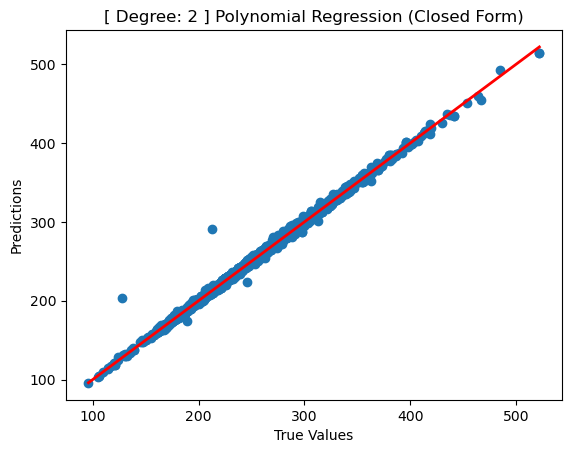

In [38]:
# for degree 2
plot_real_vs_predicted(y_val, val_pred, "[ Degree: 2 ] Polynomial Regression (Closed Form)")

In [39]:
# Degree 3

# Poly Pipeline
poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])

# Cross-validation
cv_scores = cross_val_score(poly_model_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Train the model
poly_model_pipeline.fit(X_train, y_train)

# Evaluate on validation set
val_pred = poly_model_pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)

# # Plot actual vs predicted values
# plot_real_vs_predicted(y_val, val_pred, "Polynomial Regression (Closed Form)")

print(f"Mean CV MSE: {mean_cv_score}")
print(f"Validation MSE: {val_mse}")


Mean CV MSE: 246.69699165683485
Validation MSE: 79.86543052641876


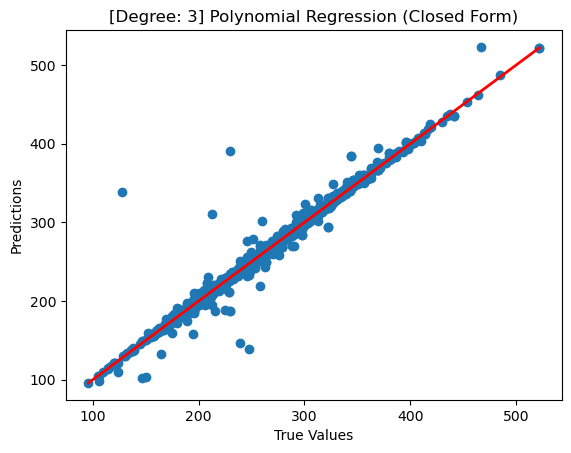

In [40]:
# for degree 3

plot_real_vs_predicted(y_val, val_pred, "[Degree: 3] Polynomial Regression (Closed Form)")

In [41]:
# Ridge, Lasso, and ElasticNet regularization for Degree 2

alphas = [0.1, 0.5, 1, 5, 10]  # Different penalty values for regularization

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:
    print(f"=================================ALPHA: {alpha}========================================================")
    for model_name, model in [('Ridge', Ridge(alpha=alpha)),
                              ('Lasso', Lasso(alpha=alpha)),
                              ('ElasticNet', ElasticNet(alpha=alpha))]:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('polynomial_features', PolynomialFeatures(degree=2)),
            ('model', model)
        ])

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()

        # Train and evaluate the model
        pipeline.fit(X_train, y_train)
        val_pred = pipeline.predict(X_val)
        val_mse = mean_squared_error(y_val, val_pred)

        # Print results of actual vs predicted
        print(f"{model_name} (alpha={alpha}) Mean CV MSE: {mean_cv_score}")
        print(f"{model_name} (alpha={alpha}) Validation MSE: {val_mse}")

        if model_name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif model_name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif model_name == 'ElasticNet':
            elastic_mse.append(mean_cv_score)

print(f"===================================================================================================")

=================================ALPHA: 0.1========================================================
Ridge (alpha=0.1) Mean CV MSE: 7.00453190833768
Ridge (alpha=0.1) Validation MSE: 12.460016644621499
Lasso (alpha=0.1) Mean CV MSE: 13.188899662851123
Lasso (alpha=0.1) Validation MSE: 18.87096427135261
ElasticNet (alpha=0.1) Mean CV MSE: 120.87904300356456
ElasticNet (alpha=0.1) Validation MSE: 127.30986873012569
=================================ALPHA: 0.5========================================================
Ridge (alpha=0.5) Mean CV MSE: 7.156782114910435
Ridge (alpha=0.5) Validation MSE: 12.197210744511883
Lasso (alpha=0.5) Mean CV MSE: 60.90932164682155
Lasso (alpha=0.5) Validation MSE: 63.5391033384079
ElasticNet (alpha=0.5) Mean CV MSE: 424.12714820710204
ElasticNet (alpha=0.5) Validation MSE: 431.65042766102573
=================================ALPHA: 1========================================================
Ridge (alpha=1) Mean CV MSE: 7.3744193809320615
Ridge (alpha=1) Validat

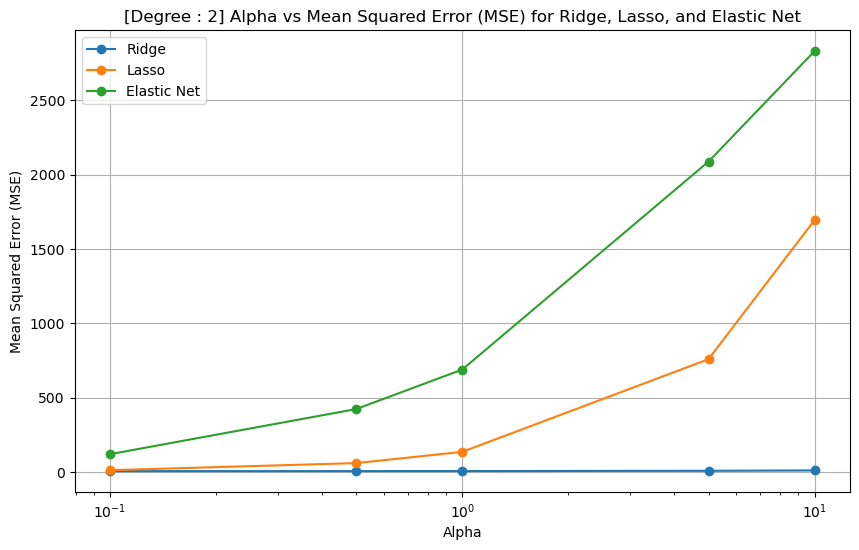

In [42]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('[Degree : 2] Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Ridge, Lasso, and ElasticNet regularization for Degree 2

alphas = [0.1, 0.5, 1, 5, 10]  # Different penalty values for regularization

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:
    print(f"=================================ALPHA: {alpha}========================================================")
    for model_name, model in [('Ridge', Ridge(alpha=alpha)),
                              ('Lasso', Lasso(alpha=alpha)),
                              ('ElasticNet', ElasticNet(alpha=alpha))]:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('polynomial_features', PolynomialFeatures(degree=3)),
            ('model', model)
        ])

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()

        # Train and evaluate the model
        pipeline.fit(X_train, y_train)
        val_pred = pipeline.predict(X_val)
        val_mse = mean_squared_error(y_val, val_pred)

        # Print results of actual vs predicted
        print(f"{model_name} (alpha={alpha}) Mean CV MSE: {mean_cv_score}")
        print(f"{model_name} (alpha={alpha}) Validation MSE: {val_mse}")

        if model_name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif model_name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif model_name == 'ElasticNet':
            elastic_mse.append(mean_cv_score)

print(f"===================================================================================================")

=================================ALPHA: 0.1========================================================
Ridge (alpha=0.1) Mean CV MSE: 7.565520088695763
Ridge (alpha=0.1) Validation MSE: 13.616547777488561
Lasso (alpha=0.1) Mean CV MSE: 13.170942171852053
Lasso (alpha=0.1) Validation MSE: 18.854207372385712
ElasticNet (alpha=0.1) Mean CV MSE: 77.81188503624145
ElasticNet (alpha=0.1) Validation MSE: 80.4903108893419
=================================ALPHA: 0.5========================================================
Ridge (alpha=0.5) Mean CV MSE: 7.408306929257722
Ridge (alpha=0.5) Validation MSE: 13.046464947481766
Lasso (alpha=0.5) Mean CV MSE: 60.90932626478739
Lasso (alpha=0.5) Validation MSE: 63.53912178359812
ElasticNet (alpha=0.5) Mean CV MSE: 314.46395350487956
ElasticNet (alpha=0.5) Validation MSE: 319.8945496686806
=================================ALPHA: 1========================================================
Ridge (alpha=1) Mean CV MSE: 7.5310513692715935
Ridge (alpha=1) Validati

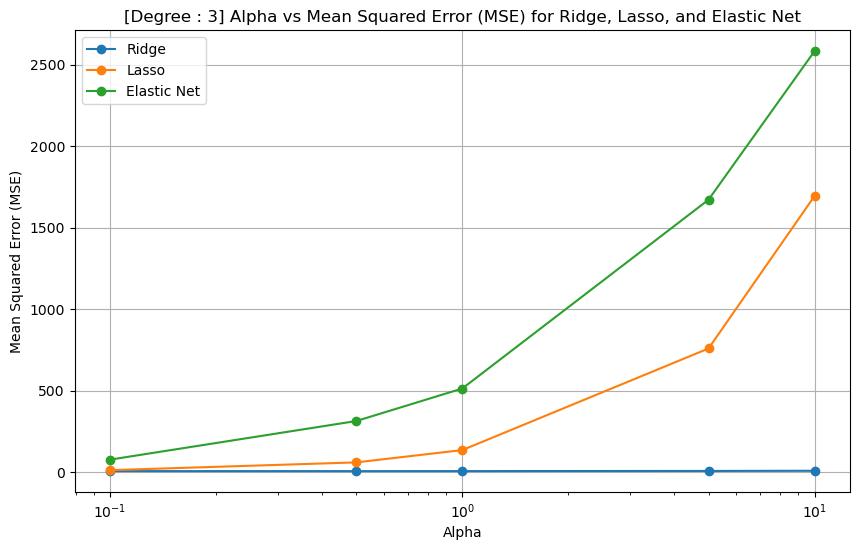

In [44]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('[Degree : 3] Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

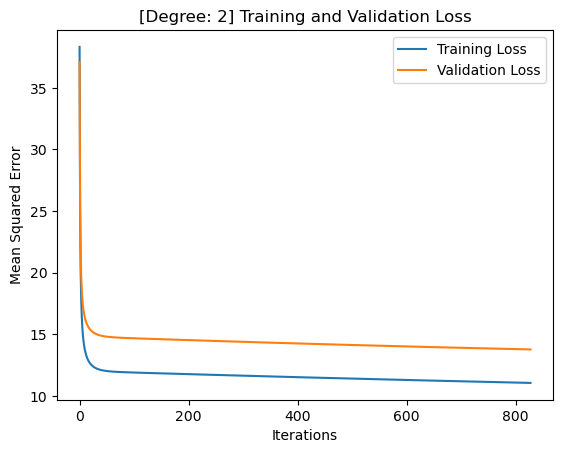

In [45]:
from sklearn.pipeline import make_pipeline

# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(emissions)
y_train_transformed = emissions_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(emissions_test)
y_test_transformed = emissions_labels_test

degree = 2
poly = PolynomialFeatures(degree=degree)

# Hyperparameters for SGDRegressor
alpha = 0.001
max_iter = 1000
tol = 1e-3
learning_rate = 'constant'  # Other options: 'optimal', 'invscaling', 'adaptive'

# Initialize model with polynomial features
model = make_pipeline(
    PolynomialFeatures(degree),
    SGDRegressor(alpha=alpha, max_iter=1, tol=None, warm_start=True, random_state=42, learning_rate=learning_rate)
)


# Initialize losses
train_losses = []
val_losses = []


# Train the model manually to track training and validation loss at each iteration
# Incremental training
for epoch in range(max_iter):
    model.fit(X_train_transformed, y_train_transformed.ravel())  # SGDRegressor with warm_start=True allows iterative training
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_transformed)
    y_val_pred = model.predict(X_test_transformed)
    
    # Calculate and store mean squared error (MSE) loss
    train_loss = mean_squared_error(y_train_transformed, y_train_pred)
    val_loss = mean_squared_error(y_test_transformed, y_val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Stopping criterion (tolerance on validation loss)
    if epoch > 1 and abs(val_losses[-2] - val_losses[-1]) < tol:
        break

# Plot training and validation loss
plt.title('[Degree: 2] Training and Validation Loss')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.show()


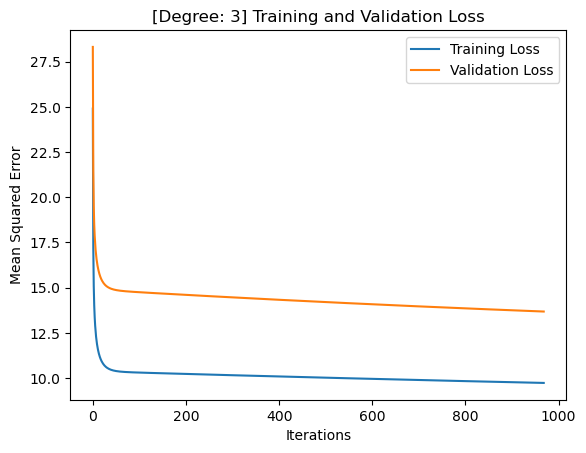

In [46]:
# for poly degree 3

from sklearn.pipeline import make_pipeline

# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(emissions)
y_train_transformed = emissions_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(emissions_test)
y_test_transformed = emissions_labels_test

degree = 3
poly = PolynomialFeatures(degree=degree)

# Hyperparameters for SGDRegressor
alpha = 0.001
max_iter = 1000
tol = 1e-3
learning_rate = 'constant'  # Other options: 'optimal', 'invscaling', 'adaptive'

# Initialize model with polynomial features
model = make_pipeline(
    PolynomialFeatures(degree),
    SGDRegressor(alpha=alpha, max_iter=1, tol=None, warm_start=True, random_state=42, learning_rate=learning_rate)
)


# Initialize losses
train_losses = []
val_losses = []


# Train the model manually to track training and validation loss at each iteration
# Incremental training
for epoch in range(max_iter):
    model.fit(X_train_transformed, y_train_transformed.ravel())  # SGDRegressor with warm_start=True allows iterative training
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_transformed)
    y_val_pred = model.predict(X_test_transformed)
    
    # Calculate and store mean squared error (MSE) loss
    train_loss = mean_squared_error(y_train_transformed, y_train_pred)
    val_loss = mean_squared_error(y_test_transformed, y_val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Stopping criterion (tolerance on validation loss)
    if epoch > 1 and abs(val_losses[-2] - val_losses[-1]) < tol:
        break

# Plot training and validation loss
plt.title('[Degree: 3] Training and Validation Loss')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.show()


# Summary of Linear and Polynomial Regression Performance on the CO2 Emissions Dataset

## Dataset Overview
- The dataset includes features related to **vehicle make, model**, **fuel consumptions**, and **fuel type**.
- The target variable, **CO2 emissions**, represents subjective well-being or happiness.

---

## Model Explanation
- A **linear regression model** was applied to predict the CO2 emissions score based on input features.

---

## Feature Scaling
- To ensure all features are on a similar scale (since they have different units), **MinMaxScaler** was applied to normalize the continuous data while **OneHotEncoder** was applied for categorical columns.
- This ensures that features like **Log GDP per capita** and **Generosity** are comparable in magnitude, improving the model's performance.

---

## Model Training and Evaluation
- The dataset was split into:
  - **Training set (75%)** 
  - **Test set (25%)**.
- The model was trained using the training set, and its performance was evaluated on both training and test sets using **Mean Squared Error (MSE)**.
  - **MSE** measures the average squared difference between actual happiness scores and predicted values.

### Performance Results for Linear Model
- **Train RMSE**: `4.723120211833487`
- **Test RMSE**: `5.183891228279423`
- **Observation**: Potential overfitting

---

### Polynomial Regression
- By including higher-degree terms, the model captures non-linear relationships in the data, resulting in better fit but with the risk of overfitting.

#### Results:
- **For Degree 3**:
  - **Mean CV MSE**: `8.501336257936307`
  - **Validation MSE**: `13.070668467765817`


- **For Degree 2**:
  - **Mean CV MSE**: `246.69699165683485`
  - **Validation MSE**: `79.86543052641876`

- **Observation**: Potential overfitting for both degrees

---

## Ridge, Lasso, and Elastic Net
- These regularized models were used to reduce overfitting by penalizing large coefficients.
  - **Ridge Regression**: Adds a penalty proportional to the square of the magnitude of the coefficients.
  - **Lasso Regression**: Adds a penalty proportional to the absolute value of the coefficients, allowing feature selection by shrinking some coefficients to zero.
  - **Elastic Net**: Combines both Ridge and Lasso penalties to balance the benefits of both methods.
  
- **Multiple alpha values** were tested to find the optimal level of regularization for each model.

---

## Hyperparameter Tuning
- **For Linear Model**:
  - **Best parameters**: '{'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'eta0': 0.1}'

- **For Polynomial Model**:
  - **Degree 3** and **Degree 2**:
    -  **Best parameters**: '{'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'eta0': 0.1}'

---

## Observations
- **Overfitting/Underfitting**:
  - The model shows potential overfitting for both linear and polynomial approaches.

---

## Conclusion
The linear regression model provides a good starting point for predicting happiness scores, capturing the linear relationships between factors like **model/make/type**, **fuel type**, and **fuel consumption** with **CO2 Emissions**. However, due to the potential presence of non-linear interactions in the data, more advanced models like **polynomial regression** could further improve prediction accuracy.
